In [11]:
import os
import glob as glob
import timecorr as tc
import niinja as nj
import hypertools as hyp
import numpy as np
import pandas as pd
import nibabel as nib
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import timecorr as tc
import numpy.ma as ma
from timecorr.helpers import isfc, wisfc, mean_combine, corrmean_combine


## import one subject's data

In [2]:
datadir = '../../data'

In [3]:
nii_files = glob.glob(os.path.join(datadir, 'new_pieman', '*/*.nii'))

In [4]:
glob.glob(os.path.join('../../data/new_pieman/sub-1', 'func', '*'))

['../../data/new_pieman/sub-1/func/sub-1-task-intact1.nii',
 '../../data/new_pieman/sub-1/func/sub-1-task-word.nii']

In [5]:
try_nii = nj.load(glob.glob(os.path.join(datadir, 'new_pieman', '*', 'func', '*.nii'))[0])

In [26]:
try_nii.affine

array([[   3.,    0.,    0.,  -90.],
       [   0.,    3.,    0., -126.],
       [   0.,    0.,    3.,  -72.],
       [   0.,    0.,    0.,    1.]])

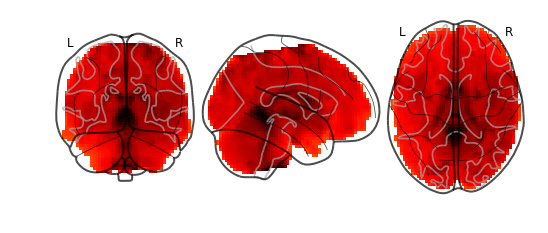

In [6]:
try_nii.plot_glass_brain()

## Import cluster mask

In [31]:
nii_mask = nj.load(os.path.join(datadir, 'Schaefer2018_100Parcels_17Networks_order_FSLMNI152_2mm.nii.gz'))


In [32]:
nii_mask.affine

array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])

### need to resample to match 3mm nii files

In [33]:
nii_mask = nj.load(os.path.join(datadir, 'Schaefer2018_100Parcels_17Networks_order_FSLMNI152_2mm.nii.gz'), vox_size=3)

/usr/local/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [34]:
nii_mask.affine

array([[  -3. ,    0. ,    0. ,   89.5],
       [   0. ,    3. ,    0. , -125.5],
       [   0. ,    0. ,    3. ,  -71.5],
       [   0. ,    0. ,    0. ,    1. ]])

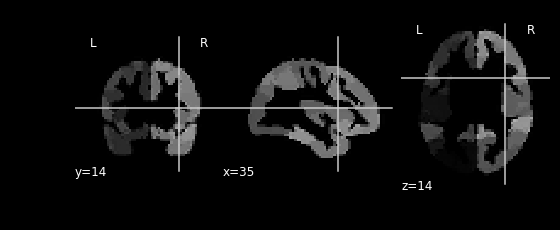

In [8]:
nii_mask.plot_anat()

### but I dont think its right

In [9]:
np.nanmax(nii_mask.get_data())

122.491806

In [16]:
xmask=nii_mask.get_data()[np.logical_not(np.isnan(nii_mask.get_data()))]


[0. 0. 0. ... 0. 0. 0.]


In [21]:
different_values = np.unique(xmask)

### not all integer values 

In [23]:
different_values.shape

(58185,)

In [24]:
xmask.max()

122.491806

In [ ]:
cluster, widths = nii_mask.cluster_centers()

In [10]:
try_nii_masked = try_nii.mask(nii_mask)

In [11]:
try_nii_masked.shape

(300, 58184)